## Breast Cancer Classification



### Content
<ul>
<li> <a id = "1">Introduction</a> </li>
<li> <a id = "2"> Importing libraries</a> </li>
<li> <a id = "3"> Read the Data </a> </li>
<li> <a id = "4"> Check the Data </a> </li>
<li><a id = "5"> Data Visualization </a></li> 
<li><a id = "6"> Test ,Train, Split  </a></li>
<li> <a id = "7"> Scaling the data </a> </li>
<li><a id = "8">  Build a model </a> </li>
    <ul>
   <li><a id = "9">  logistic regression </a></li>
   <li> <a id = "10">  Decision Tree </a></li>
  <li> <a id = "11">  Random Forest </a></li>
   <li> <a id = "12"> K-Nearest Neighbors classifier </a></li> 
  <li> <a id = "13">   GridSearchCV </a></li> 
  <li> <a id = "14">  Support Vector Machine </a></li>  
    </ul>
    

</ul>



## <a id = "1">Introduction</a>

**Breast cancer** is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The dataset contains **32 features** and is very effective for working on experiments related to breast cancer.The key **challenges** against it’s detection is how to classify **tumors** into **Benign** which is the non-cancerous tumour and **Malignant** which is cancerous tumour. I used several **machine learning algorithms**, which will be able to **effectively** model analysis.

**Acknowledgements:**
This dataset has been referred from Kaggle.The data set used is Wisconsin Breast cancer (WBC) original data set which is publicly available in the UCI machine learning repository.



###  <a id = "2">Importing libraries </a>

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report,confusion_matrix
import plotly.offline as py
import plotly.graph_objs as go



###  <a id = "3">Read the Data </a>


In [3]:
df_data = pd.read_csv('E:\Python\data.csv')


####  Top 5 rows from the dataframe

Here we look at the data features on the first five rows.

In [4]:
df_data.head()  # displays the first five rows of the dataframe by default.

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

####  last 5 rows from the dataframe

Here we look at the data features on the last five rows.

In [5]:
df_data.tail()  # displays the last five rows of the dataframe by default.

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

###  <a id = "4"> Check the Data </a>

In [6]:
df_data.info()  # This method printed the complete summary of the given dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#  Remove the column Unnamed:32, in this column with so many missing numbers.
df_data=df_data.dropna(axis=1)


In [8]:
print(df_data.isnull().sum()) # Here we check again the any null value within the column.

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [9]:
"""
describe() method is used for calculating some statistical data like 
percentile, mean and std of the numerical values of the Series or DataFrame.
"""

df_data.describe() 

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

### <a id = "5"> Data Visualization </a> 

(array([ 19.,  79., 185., 129.,  55.,  50.,  38.,   7.,   4.,   3.]),
 array([ 6.981 ,  9.0939, 11.2068, 13.3197, 15.4326, 17.5455, 19.6584,
        21.7713, 23.8842, 25.9971, 28.11  ]),
 <BarContainer object of 10 artists>)

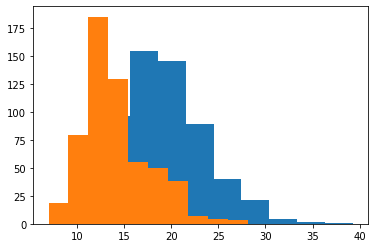

In [10]:
plt.hist(df_data.texture_mean)
plt.hist(df_data.radius_mean)

#### The mean of texture_mean and radius mean are 19.28964850615117 and 14.127291739894563 respectively. This is verified from above plot also.

In [11]:
# label encoding(convert the value of M and B into 1 and 0)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df_data.iloc[:,1]=labelencoder_Y.fit_transform(df_data.iloc[:,1].values)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\ProgramData\Anaconda3\lib\site-pac

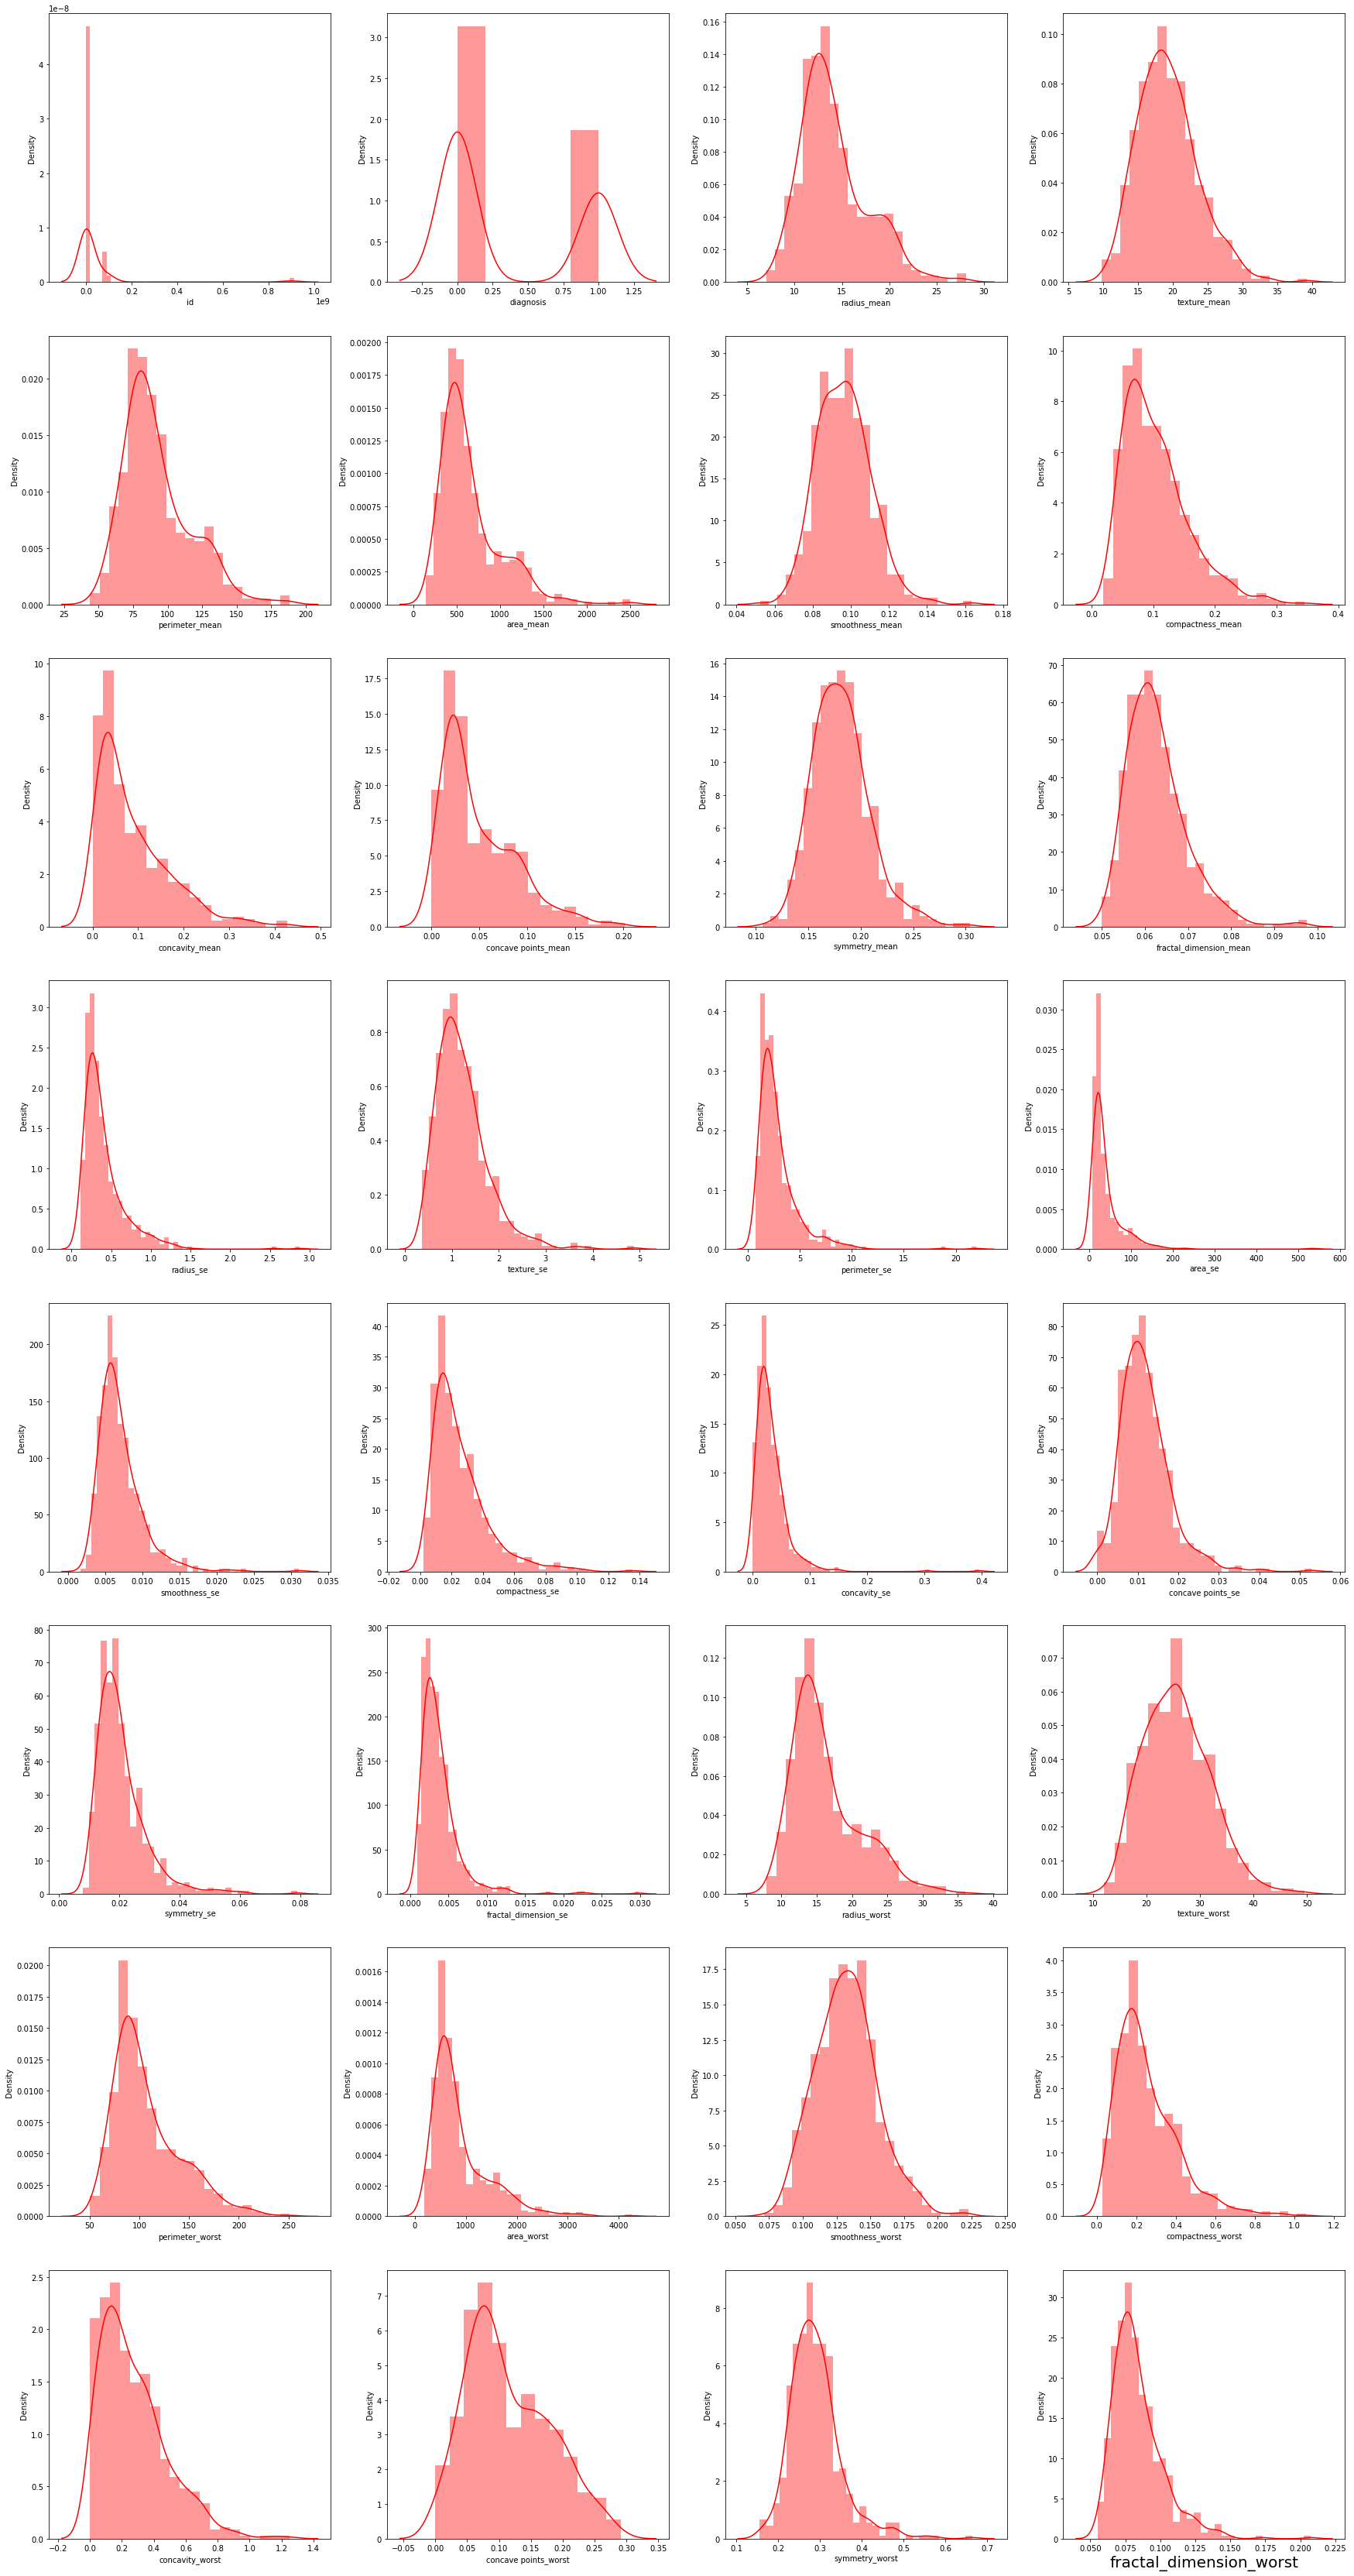

In [12]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(8,4, figsize=(30,60))
k = 0
columns = list(df_data.columns)
for i in range(8):
    for j in range(4):
            sns.distplot(df_data[columns[k]], ax = ax1[i][j], color = 'red')
            plt.xlabel(columns[k],size=20)
            k += 1
plt.show()

**Most of our columns are highly skewed towards right. These columns include compactness_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, smoothness_se, compactness_se, concavity_se, symmetry_se, fractal_dimension_se, area_worst, compactness_worst, concavity_worst.**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



'\nIn that we explore the output column. \nShowing the total count of malignant and benign cancer patients in counterplot.\nonly half of the class are malignant and around 350 is benign.  \n\n'

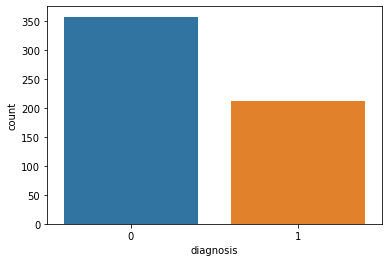

In [13]:
sns.countplot(df_data['diagnosis'],label="count") 

"""
In that we explore the output column. 
Showing the total count of malignant and benign cancer patients in counterplot.
only half of the class are malignant and around 350 is benign.  

"""


In [14]:
trace = go.Pie(labels = ['benign','malignant'], values =(df_data['diagnosis'].value_counts()), 
               textfont=dict(size=10), opacity = 0.8,
               marker=dict(colors=['lightskyblue', 'gold'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of diagnosis variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

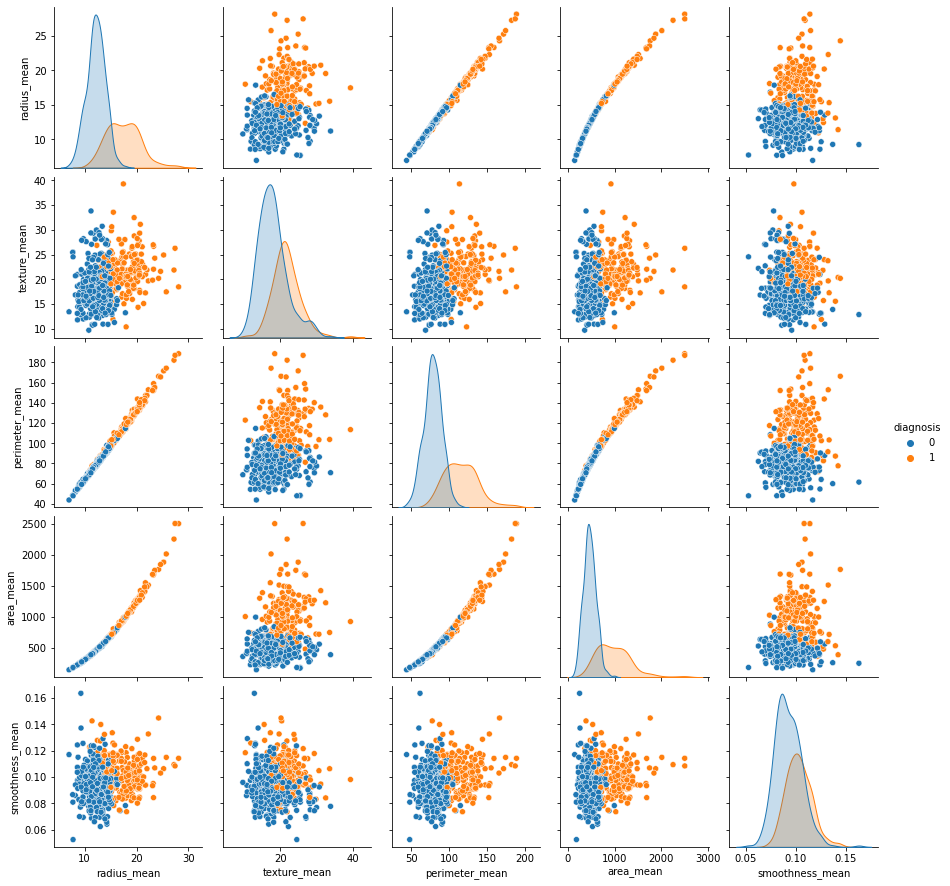

In [15]:
# pair plot of sample feature
sns.pairplot(df_data, hue = 'diagnosis', 
             vars = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean'] )


### The above pair plot showing malignant and benign cancer data distributed in two classes. It is easy to differentiate in the pair plot.

<AxesSubplot:>

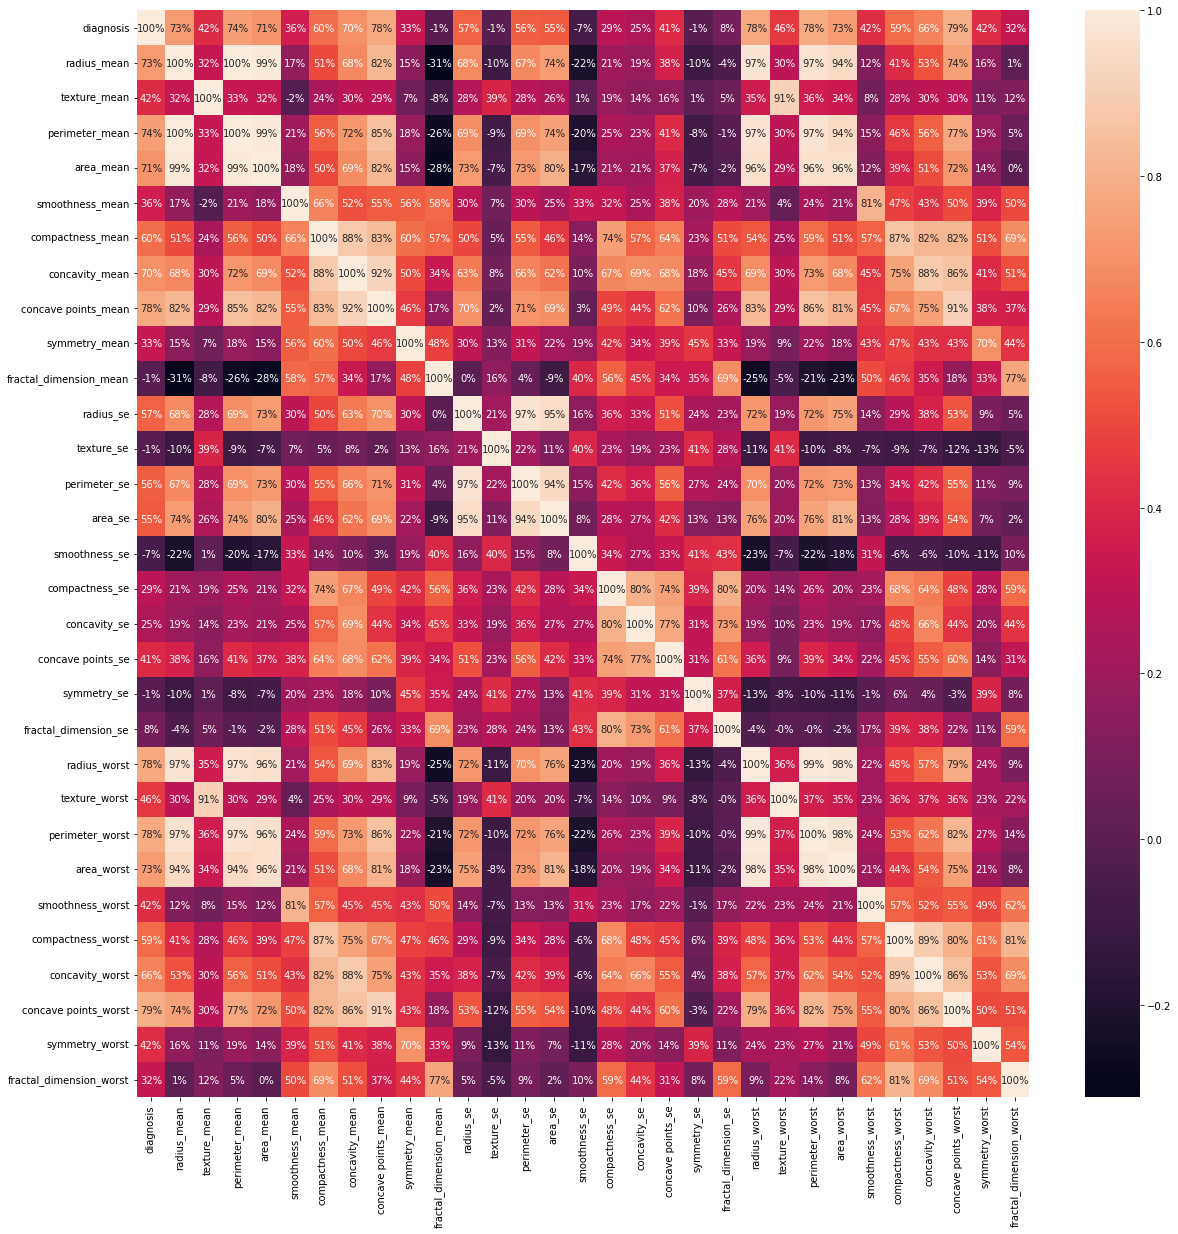

In [16]:
"""
visualize the Correlation matrix : To find a correlation between each feature and diagnosis.
we visualize heatmap using the correlation matrix.

"""
plt.figure(figsize=(20,20))
sns.heatmap(df_data.iloc[:,1:32].corr(),annot=True,fmt=".0%") 

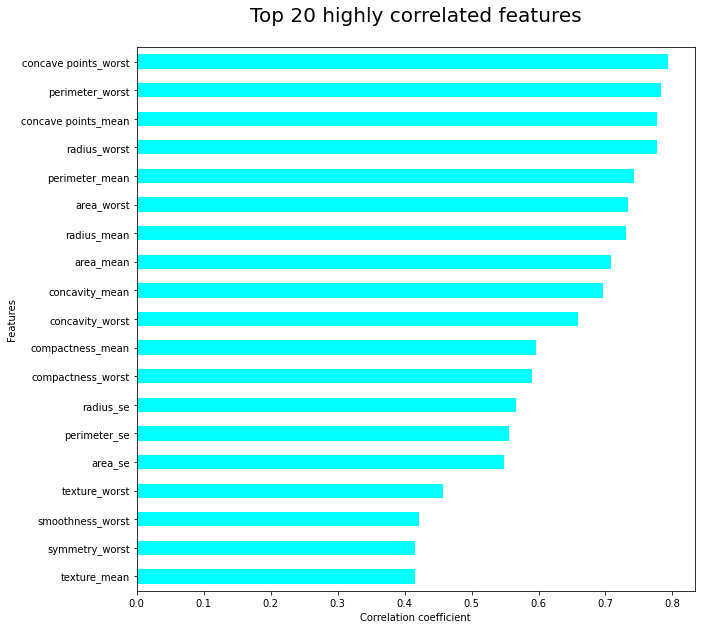

In [17]:
plt.figure(figsize=(10,10))
df_data.corr().diagnosis.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:20][::-1].plot(kind='barh',color='cyan') 

# calculating the top 5 highest correlated features with respect to the target variable"

plt.title("Top 20 highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")
plt.show()

###  The features are divided into three groups: mean, Se and worst

In [18]:
#For a merge + slice:
data_mean=df_data.iloc[:,2:12]     
data_se=df_data.iloc[:,12:22]
data_worst=df_data.iloc[:,22:]

print(data_mean.columns)
print(data_se.columns)
print(data_worst.columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


###  Group feature visualization — histogram

array([[<AxesSubplot:title={'center':'radius_worst'}>,
        <AxesSubplot:title={'center':'texture_worst'}>,
        <AxesSubplot:title={'center':'perimeter_worst'}>],
       [<AxesSubplot:title={'center':'area_worst'}>,
        <AxesSubplot:title={'center':'smoothness_worst'}>,
        <AxesSubplot:title={'center':'compactness_worst'}>],
       [<AxesSubplot:title={'center':'concavity_worst'}>,
        <AxesSubplot:title={'center':'concave points_worst'}>,
        <AxesSubplot:title={'center':'symmetry_worst'}>],
       [<AxesSubplot:title={'center':'fractal_dimension_worst'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

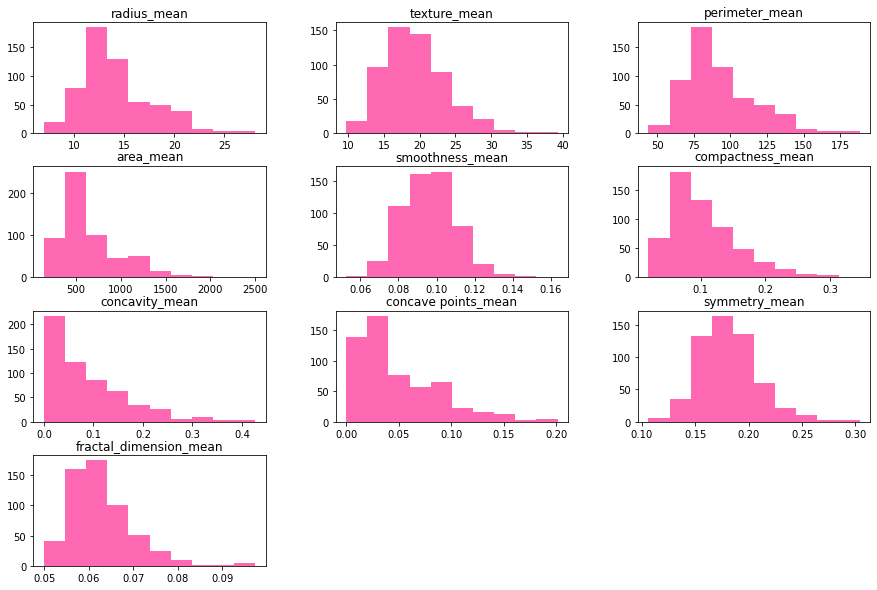

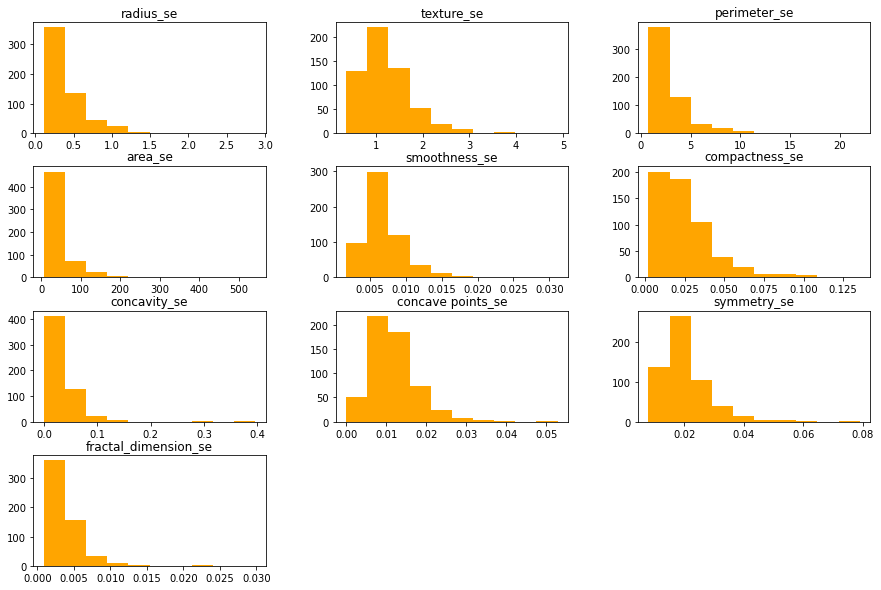

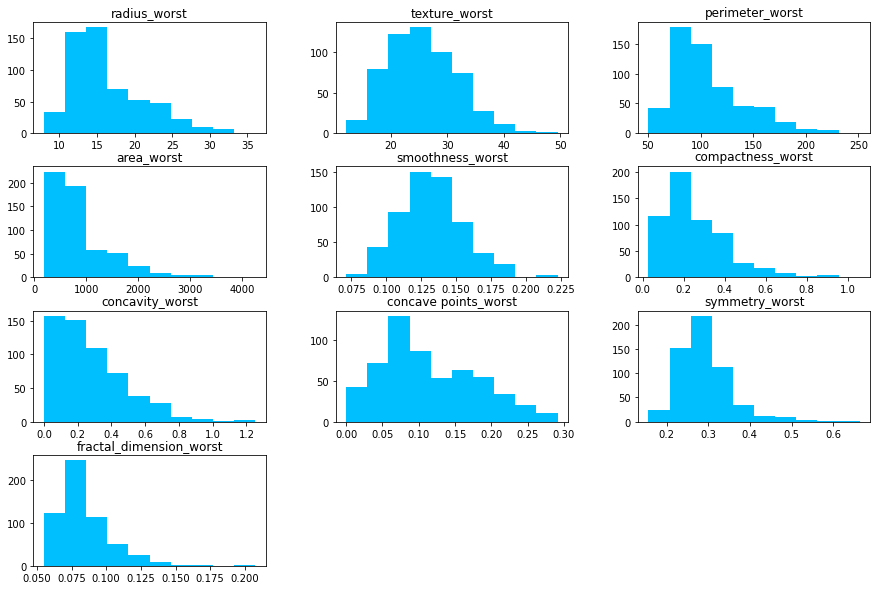

In [19]:
#Plot histograms of CUT1 variables
data_mean.hist(bins=10, figsize=(15, 10),grid=False,color = "HotPink")  
data_se.hist(bins=10, figsize=(15, 10),grid=False,color = "orange")
data_worst.hist(bins=10, figsize=(15, 10),grid=False,color = "DeepSkyBlue")

#### As we see the above plot  , maybe attribute Concavity, May have an exponential distribution. We can also see that,Texture, smoothing, symmetry attribute. May have a Gaussian or near Gaussian distribution. 

In [20]:
# We will only be using the top 20 correlated features to train our model, this will hellp improve the accuacy.


selected_features=df_data.corr().diagnosis.sort_values(ascending=False).iloc[1:21][::-1].index

X = df_data[selected_features]
Y = df_data.diagnosis

In [21]:
# split the dataset into dependent(X) and Independent(Y) datasets
X=df_data.iloc[:,2:31].values
Y=df_data.iloc[:,1].values

### <a id = "6"> Test ,Train, Split  </a>

In [22]:
# spliting the data into trainning and test dateset

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 



### <a id = "7"> Scaling the data </a> 

In [23]:
# feature scaling
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

###  <a id = "8">  Build a model </a> 

###  <a id = "9">  mode 1  </a> 

In [24]:
 #logistic regression
LR = LogisticRegression()  # Activate model
LR.fit(X_train,Y_train) # training of model
Y_pred_LR = LR.predict(X_test)  # Finding out the y from the model
Y_pred_LR

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [25]:
LR.score(X_test, Y_test) # find out the model score

0.9649122807017544

In [26]:
acc_lr = accuracy_score(Y_test,Y_pred_LR) # # find out the model accuracy
acc_lr

0.9649122807017544

In [27]:
print(classification_report(Y_test, Y_pred_LR))
print('\n')
print(confusion_matrix(Y_test, Y_pred_LR))
print('\n')
print(accuracy_score(Y_test, Y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



[[66  1]
 [ 3 44]]


0.9649122807017544


### <a id = "10">  mode 2  </a> 

In [28]:
#Decision Tree
TR = DecisionTreeClassifier(random_state=0,criterion="entropy")  # Activate model
TR.fit(X_train,Y_train) # training of model
Y_pred_TR = TR.predict(X_test)  # Finding out the y from the model
Y_pred_TR       

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0])

In [29]:
TR.score(X_test, Y_test) # find out the model score

0.9385964912280702

In [30]:
acc_tr = accuracy_score(Y_test,Y_pred_TR) # # find out the model accuracy
acc_tr

0.9385964912280702

In [31]:
print(classification_report(Y_test, Y_pred_TR))
print('\n')
print(confusion_matrix(Y_test,Y_pred_TR))
print('\n')
print(accuracy_score(Y_test, Y_pred_TR))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



[[64  3]
 [ 4 43]]


0.9385964912280702


###  <a id = "11">  mode 3  </a> 

In [32]:
#Random Forest
RF = DecisionTreeClassifier(random_state=0,criterion="entropy")  # Activate model
RF.fit(X_train,Y_train) # training of model
Y_pred_RF = RF.predict(X_test)  # Finding out the y from the model
Y_pred_RF              

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0])

In [33]:
RF.score(X_test, Y_test) # find out the model score

0.9385964912280702

In [34]:
acc_fr = accuracy_score(Y_test,Y_pred_RF) # # find out the model accuracy
acc_fr

0.9385964912280702

In [35]:
print(classification_report(Y_test, Y_pred_RF))
print('\n')
print(confusion_matrix(Y_test, Y_pred_RF))
print('\n')
print(accuracy_score(Y_test, Y_pred_RF))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        67
           1       0.93      0.91      0.92        47

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



[[64  3]
 [ 4 43]]


0.9385964912280702


###  <a id = "12">  mode 4  </a> 

In [36]:
# K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=10)

In [37]:
knn.fit(X_train,Y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [38]:
knn.score(X_train,Y_train)

0.9758241758241758

In [39]:
acc_knn = accuracy_score(Y_test,y_pred_knn) 
acc_knn

0.956140350877193

In [40]:
print("Classification report :")
print(classification_report(Y_test,y_pred_knn))
print("\n")
print("Confusion Matrix :")
print(confusion_matrix(Y_test,y_pred_knn))
print("\n")
print("Accuracy score :")
print(accuracy_score(Y_test,y_pred_knn))

Classification report :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion Matrix :
[[67  0]
 [ 5 42]]


Accuracy score :
0.956140350877193


###  <a id = "13">  mode 5  </a> 

In [41]:
#GridSearchCV
parameters = {'n_neighbors':range(1,50)}
grid = GridSearchCV(knn, parameters,cv=5)

In [42]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': range(1, 50)})

In [43]:
grid.best_params_

y_pred_grid = grid.predict(X_test)
y_pred_grid

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [44]:
grid.best_score_

0.9604395604395604

In [45]:
grid.score(X_test,Y_test)

0.956140350877193

In [46]:
acc_grid = accuracy_score(Y_test,y_pred_grid)
acc_grid

0.956140350877193

In [47]:
print("Classification report :")
print(classification_report(Y_test,y_pred_grid))
print("\n")
print("Confusion Matrix :")
print(confusion_matrix(Y_test,y_pred_grid))
print("\n")
print("Accuracy score :")
print(accuracy_score(Y_test,y_pred_grid))

Classification report :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion Matrix :
[[67  0]
 [ 5 42]]


Accuracy score :
0.956140350877193


###  <a id = "14">  mode 6  </a> 

In [48]:
# Support Vector Machine

svm=SVC(kernel="rbf",random_state=0)
svm.fit(X_train,Y_train)

SVC(random_state=0)

In [49]:
Y_pred_svm=svm.predict(X_test)
Y_pred_svm

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0])

In [50]:
svm.score(X_test,Y_test)

0.9824561403508771

In [51]:
acc_svm = accuracy_score(Y_test,y_pred_grid)
acc_svm

0.956140350877193

In [52]:
Logistic_Regression_accuracy=round(accuracy_score(Y_test,Y_pred_LR), 4)*100

Decision_Tree_accuracy=round(accuracy_score(Y_test,Y_pred_TR), 4)*100

Random_forest_classifier_accuracy=round(accuracy_score(Y_test,Y_pred_RF), 4)*100

SVM_accuracy=round(accuracy_score(Y_test,Y_pred_svm), 4)*100

KNN_accuracy=round(accuracy_score(Y_test,y_pred_knn), 4)*100

GridSearchCV_accuracy=round(accuracy_score(Y_test,y_pred_grid), 4)*100

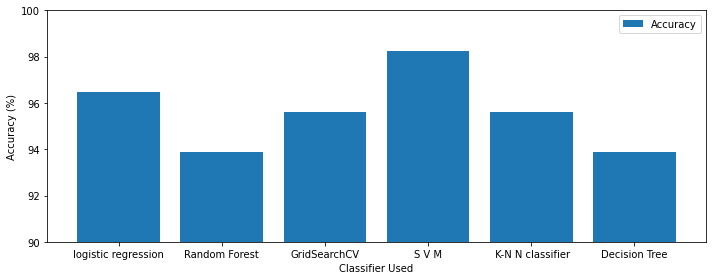

In [53]:


accuracies={"logistic regression":Logistic_Regression_accuracy,
            "Random Forest":Random_forest_classifier_accuracy,
            "GridSearchCV":GridSearchCV_accuracy,
            "S V M":SVM_accuracy,
            " K-N N classifier": KNN_accuracy,
            "Decision Tree": Decision_Tree_accuracy}

#Plot accuracy for different models
plt.figure(figsize=(10,4))
plt.bar(accuracies.keys(),accuracies.values(),label="Accuracy")
plt.xlabel("Classifier Used")
plt.ylabel("Accuracy (%)")
plt.ylim(90,100)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusions :**  I  used to classify breast cancer tumors,  machine learning algorithms. The former applied various algorithms, but the most promising algorithm is the support vector machine (SVM). For compared SVM with other algorithms such as K-NN, logistic regression, Random Forest, K-means, GridSearchCV, Decision Tree. They found that the SVM surpassed these methods with accuracy reached 98%